<h3><b>USA House Price Analysis</b></h3>
<p>Factors that influencing the prices of houses in USA over time are analysed in this model, graphically demonstrated and discussed.</p>
<p>Some of the factors looked into by this model include: </p>
<ol>
<li>Cost of building materials and labour.</li>
<li>Economic growth rate.</li>
<li>Stock market exchange rate for the dollar.</li>
<li>Population growth rate</li>
<li>Income per Capita from GDP</li>
<li>Unemployment rate</li>
<li>Price for rental spaces</li>
</ol>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2><u>Data Preprocessing</u></h2>
<h5>Income per Capita</h5>
<p>The price to income ratio will be checked against the Income per Capita as a very crucial metric</p>

In [5]:
pci = pd.read_csv("CSV_Files/personal_pcapita_income.csv")
print(pci)
print()
print("Shape: ", pci.shape)

           DATE  A792RC0Q052SBEA
0    1947-01-01           1325.0
1    1947-04-01           1319.0
2    1947-07-01           1369.0
3    1947-10-01           1383.0
4    1948-01-01           1417.0
..          ...              ...
303  2022-10-01          66649.0
304  2023-01-01          67685.0
305  2023-04-01          68276.0
306  2023-07-01          68824.0
307  2023-10-01          69377.0

[308 rows x 2 columns]

Shape:  (308, 2)


<p>As observed above, the dataframe contains income per capita for USA from 1947 all the way to 2023.</p>

<h5>House Prices for Purchase</h5>
<p>The prices for houses from 1963 1ll the way to 2023.</p>

In [6]:
hprices = pd.read_csv("CSV_Files/sp_house_price_index.csv")
print(hprices.head())
print()
print("Shape: ", hprices.shape)
print(hprices.tail())

         DATE  CSUSHPISA
0  1987-01-01     63.965
1  1987-02-01     64.424
2  1987-03-01     64.736
3  1987-04-01     65.131
4  1987-05-01     65.564

Shape:  (444, 2)
           DATE  CSUSHPISA
439  2023-08-01    309.236
440  2023-09-01    311.195
441  2023-10-01    312.882
442  2023-11-01    313.648
443  2023-12-01    314.259


<p>Combining the two datasets for house prices and that of income to see their relation.</p>
<p>This will guide on the relationship between between individual income and house prices.</p>

In [7]:
# Function to merge dataframes and return the new df

def merge_df(df1, df2):
    '''Merging the two data frames
    Args:
        df1 (pd.DataFrame()) - Pandas Dataframe
        df2 (pd.DataFrame()) - Pandas Dataframe
    Return:
        Merged dataframe
    '''
    return pd.merge(df1, df2, on="DATE", how="inner")

In [8]:
"""
Merging the two data frames, that of the percapita income against that of house prices.
The data is marged on the dates , therefore all columns which have different dates are dropped.
 
"""
hp_pci = merge_df(pci, hprices)

In [9]:
hp_pci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             148 non-null    object 
 1   A792RC0Q052SBEA  148 non-null    float64
 2   CSUSHPISA        148 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [10]:
# renaming the columns to have well elaborate column names tpo work with
hp_pci = hp_pci.rename(columns={"A792RC0Q052SBEA": "per_capita_income", "CSUSHPISA": "house_price_index"})

In [11]:
hp_pci.head()

,DATE,per_capita_income,house_price_index
0,1987-01-01,15880.0,63.965
1,1987-04-01,16086.0,65.131
2,1987-07-01,16338.0,66.506
3,1987-10-01,16703.0,67.738
4,1988-01-01,17007.0,68.857


In [12]:
# Checking for missing values
hp_pci.isna().sum()

DATE                 0
per_capita_income    0
house_price_index    0
dtype: int64

In [13]:
hp_pci['year'] = pd.DatetimeIndex(hp_pci['DATE']).year


In [14]:
hp_pci.head()

,DATE,per_capita_income,house_price_index,year
0,1987-01-01,15880.0,63.965,1987
1,1987-04-01,16086.0,65.131,1987
2,1987-07-01,16338.0,66.506,1987
3,1987-10-01,16703.0,67.738,1987
4,1988-01-01,17007.0,68.857,1988


<h5>Income per capita for individuals</h5>
<p>Graphical representations for the data.</p>

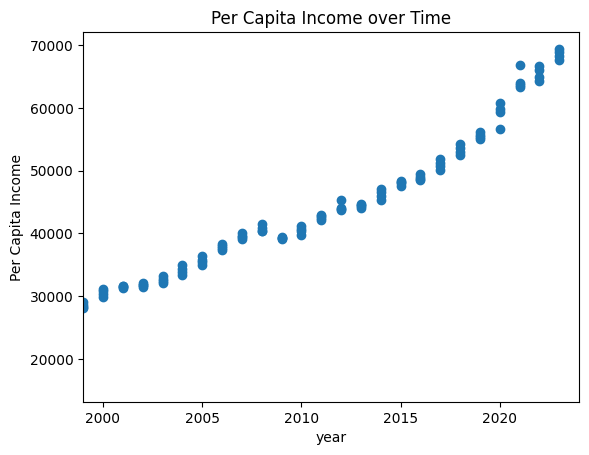

In [15]:
plt.figure()
plt.scatter(hp_pci.year, hp_pci.per_capita_income)
plt.xlim(1999, 2024)
plt.xlabel("year")
plt.ylabel("Per Capita Income")
plt.title("Per Capita Income over Time")
plt.show()

<h5>House prices change against time</h5>

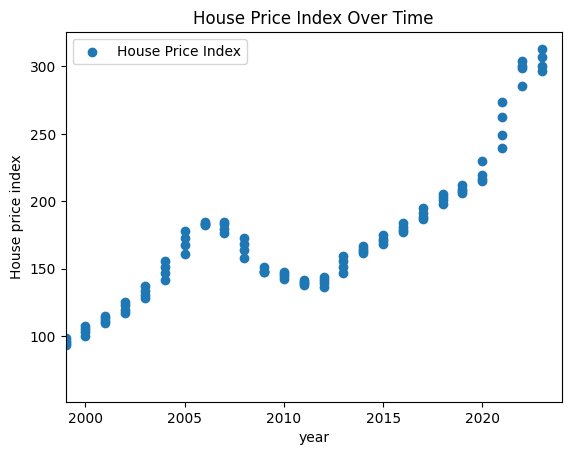

In [16]:
plt.figure()
plt.scatter(hp_pci.year, hp_pci.house_price_index, label="House Price Index")
plt.xlim(1999, 2024)
plt.xlabel("year")
plt.ylabel("House price index")
plt.title("House Price Index Over Time")
plt.legend()
plt.show()

<h5>Comparing house prices and income per capita using line graph</h5>

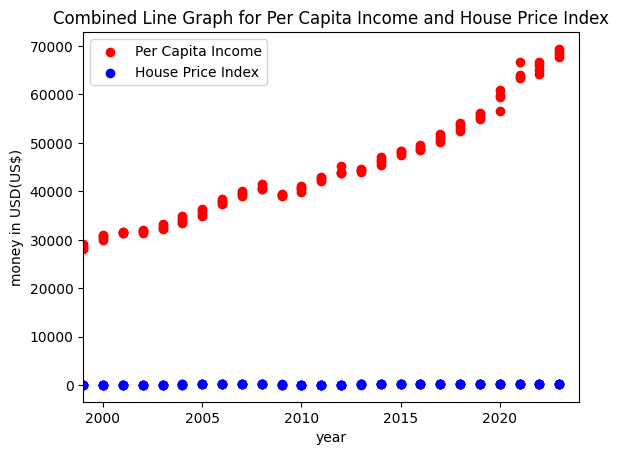

In [17]:
plt.figure()
plt.scatter(hp_pci.year, hp_pci.per_capita_income, label="Per Capita Income", color="red")
plt.scatter(hp_pci.year, hp_pci.house_price_index, label="House Price Index", color="blue")
plt.xlim(1999, 2024)
plt.xlabel("year")
plt.ylabel("money in USD(US$)")
plt.title("Combined Line Graph for Per Capita Income and House Price Index")
plt.legend()
plt.show()

<ul>
<li>From the above plots: Per Capita Income against Time and House Price Index against time, we are able to observe the difference in the increase</li>
<li>Per Capita Income rises from about $30,000 to about $70,000 while House prices rise from about $150,000 to about $500,000 between 1999 and 2024.</li>
<li>When house prices rise faster than household income, the price-to-income ratio increases. This can make housing less affordable for potential buyers</li>
</ul>

In [18]:
hp_pci[['per_capita_income', 'house_price_index']].corr()

,per_capita_income,house_price_index
per_capita_income,1.000000,0.960546
house_price_index,0.960546,1.000000


<p><b>Strong positive co-relation: </b>There is very close positive relationship between the income per capita and house price. Therefore, an increase in per capita income leads to an increase in house price.</p>

In [19]:
# Creating a new column showing the price-to-income ratio across all years of the dataframe
hp_pci['price_to_income_ratio'] = hp_pci['house_price_index'] / hp_pci['per_capita_income']

In [20]:
hp_pci.describe()

,per_capita_income,house_price_index,year,price_to_income_ratio
count,148.000000,148.000000,148.000000,148.000000
mean,37128.527027,142.504169,2005.000000,0.003803
std,14348.294879,62.286685,10.713333,0.000433
min,15880.000000,63.965000,1987.000000,0.003125
25%,24554.500000,82.274250,1996.000000,0.003494
50%,35612.000000,141.582500,2005.000000,0.003730
75%,46676.250000,178.847500,2014.000000,0.004044
max,69377.000000,312.882000,2023.000000,0.004892


<h5>Price to Income Ratio</h5>

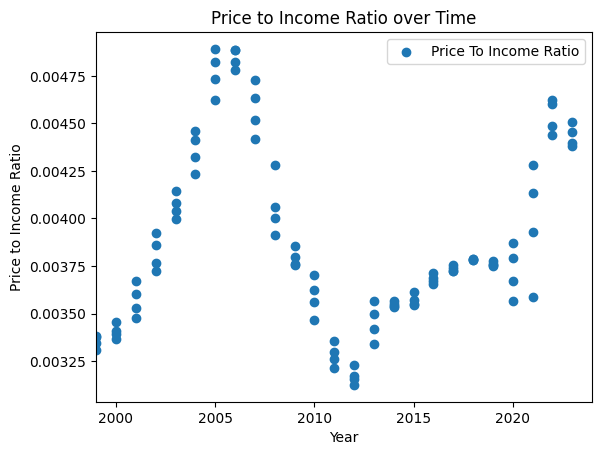

In [21]:
plt.figure()
plt.scatter(hp_pci.year, hp_pci.price_to_income_ratio, label="Price To Income Ratio")
plt.xlim(1999,2024)
plt.xlabel("Year")
plt.ylabel("Price to Income Ratio")
plt.title("Price to Income Ratio over Time")
plt.legend()
plt.show()

<p>The plot shows price to income ratio for the data. It is notable that the price to income ratio was least around 2011.</p>
<p>All the PTI values are above 1. The house prices were higher relative to individual incomes.</p>
<p>The houses were out of affordability to the population</p>

<h3>Cost of building Materials and Labour</h3>
<p>Adding a dataset showing the percentage change in the price of the cost of labor and building materials every year.</p>
<p>This column will be used to check the co-relation between the price of a house and the cost of building materials and labor.</p>

In [22]:
labor_material_resources = pd.read_csv("CSV_Files/retail_cost_of_labor_building_materials.csv") # Dataset showing the percentage change in cost of labour and building materials.
labor_material_resources.head()

,DATE,SPPOPGROWUSA
0,1961-01-01,1.657730
1,1962-01-01,1.537997
2,1963-01-01,1.439165
3,1964-01-01,1.389046
4,1965-01-01,1.250172


In [23]:
labor_material_resources = labor_material_resources.rename(columns={"SPPOPGROWUSA": "pc_change_labor"})

In [24]:
labor_material_resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             62 non-null     object 
 1   pc_change_labor  62 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [25]:
hp_pci_material_resources = merge_df(hp_pci, labor_material_resources)

In [26]:
hp_pci_material_resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   36 non-null     object 
 1   per_capita_income      36 non-null     float64
 2   house_price_index      36 non-null     float64
 3   year                   36 non-null     int32  
 4   price_to_income_ratio  36 non-null     float64
 5   pc_change_labor        36 non-null     float64
dtypes: float64(4), int32(1), object(1)
memory usage: 1.7+ KB


In [27]:
hp_pci_material_resources.head()

,DATE,per_capita_income,house_price_index,year,price_to_income_ratio,pc_change_labor
0,1987-01-01,15880.0,63.965,1987,0.004028,0.893829
1,1988-01-01,17007.0,68.857,1988,0.004049,0.907999
2,1989-01-01,18396.0,73.946,1989,0.004020,0.944406
3,1990-01-01,19344.0,76.897,1990,0.003975,1.129651
4,1991-01-01,19812.0,75.915,1991,0.003832,1.336261


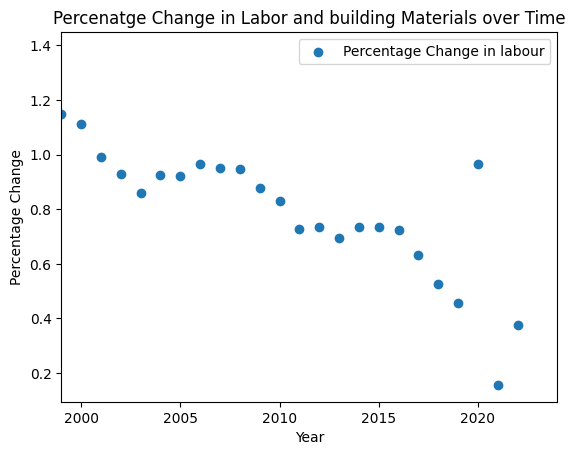

In [28]:
plt.figure()
plt.scatter(hp_pci_material_resources.year, hp_pci_material_resources.pc_change_labor, label="Percentage Change in labour")
plt.xlim(1999, 2024)
plt.xlabel("Year")
plt.ylabel("Percentage Change")
plt.legend()
plt.title("Percenatge Change in Labor and building Materials over Time")
plt.show()

<p>The cost of materials and labor progressively reduces in percentage change over time.</p>
<p>This almost constant rate tends to retain change the price of houses progressively. As shown in the graph of House Price Index Over Time drawn previously.</p>

<h4>Co-relation of Price-income ratio and Percentage change in labor and building materials</h4>

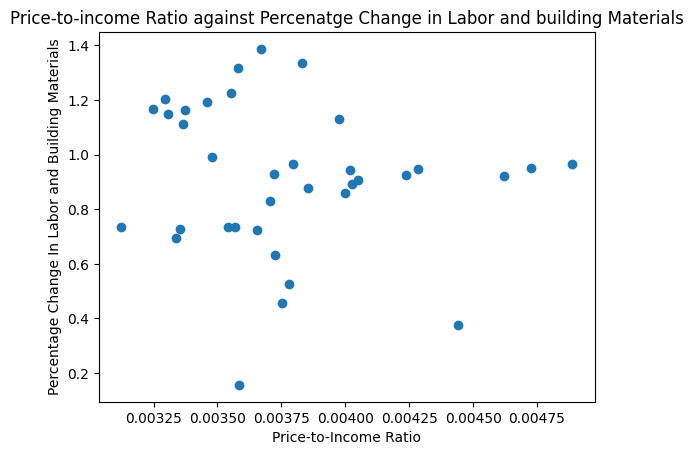

In [29]:
plt.figure()
plt.scatter(hp_pci_material_resources.price_to_income_ratio, hp_pci_material_resources.pc_change_labor)
plt.xlabel("Price-to-Income Ratio")
plt.ylabel("Percentage Change In Labor and Building Materials")
plt.title("Price-to-income Ratio against Percenatge Change in Labor and building Materials")
plt.show()

In [30]:
hp_pci_material_resources[['price_to_income_ratio', 'pc_change_labor']].corr()

,price_to_income_ratio,pc_change_labor
price_to_income_ratio,1.000000,-0.119606
pc_change_labor,-0.119606,1.000000


<p>From the plot above, there is no strong co-relation between the price-to-income ratio and the percantage change in labor and building material price.</p>
<p><b>Little Correlation:</b> the scattered points form a shapeless cloud, it indicates no significant correlation. Changes in one variable do not consistently predict changes in the other.</p>

<h4>Co-relation between PC change in Labor and building materials against house Prices</h4>

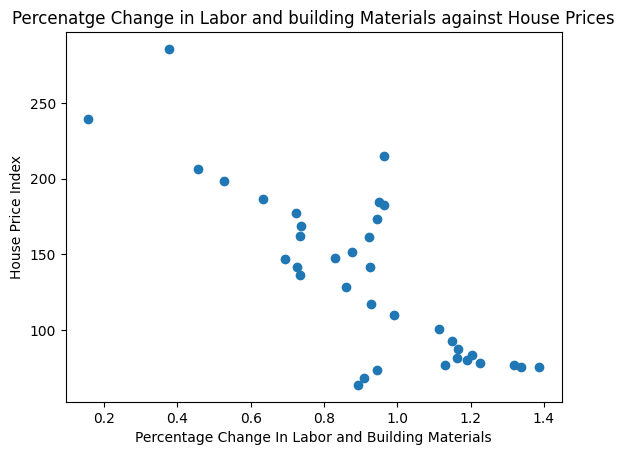

In [31]:
plt.figure()
plt.scatter(hp_pci_material_resources.pc_change_labor, hp_pci_material_resources.house_price_index)
plt.xlabel("Percentage Change In Labor and Building Materials")
plt.ylabel("House Price Index")
plt.title("Percenatge Change in Labor and building Materials against House Prices")
plt.show()

In [32]:
hp_pci_material_resources[['pc_change_labor', 'house_price_index']].corr()

,pc_change_labor,house_price_index
pc_change_labor,1.00000,-0.80166
house_price_index,-0.80166,1.00000


<p><b>Strong Co-relation: </b>The closer the correlation coefficient is to -1, the stronger the negative relationship.</p>
<p>There exist <b>negative co-relation</b> between the two values which is <b>-0.70179</b>. This means that as one decreases the other increases. In this case, as the house price decreases, the percentage change in labour and building materials increases.</p> 
<p>It can be further interpreted as: the house prices are inversely related to Percentage change in labour and house prices.</p>

In [33]:
hp_pci_material_resources.head()

,DATE,per_capita_income,house_price_index,year,price_to_income_ratio,pc_change_labor
0,1987-01-01,15880.0,63.965,1987,0.004028,0.893829
1,1988-01-01,17007.0,68.857,1988,0.004049,0.907999
2,1989-01-01,18396.0,73.946,1989,0.004020,0.944406
3,1990-01-01,19344.0,76.897,1990,0.003975,1.129651
4,1991-01-01,19812.0,75.915,1991,0.003832,1.336261


<h4><b>Co-relation between Percentage change in labour and Income per Capita</b></h4>

In [34]:
hp_pci_material_resources[['pc_change_labor', 'per_capita_income']].corr()

,pc_change_labor,per_capita_income
pc_change_labor,1.000000,-0.840587
per_capita_income,-0.840587,1.000000


<h4>Population Growth Rate</h4>

In [35]:
pop = pd.read_csv("CSV_Files/population_grate.csv")
pop.head()

,DATE,IPUHN444U101000000
0,1988-01-01,-4.3
1,1989-01-01,4.7
2,1990-01-01,2.1
3,1991-01-01,3.7
4,1992-01-01,-4.0


In [36]:
joint_df = merge_df(hp_pci_material_resources, pop)
joint_df.head()

,DATE,per_capita_income,house_price_index,year,price_to_income_ratio,pc_change_labor,IPUHN444U101000000
0,1988-01-01,17007.0,68.857,1988,0.004049,0.907999,-4.3
1,1989-01-01,18396.0,73.946,1989,0.004020,0.944406,4.7
2,1990-01-01,19344.0,76.897,1990,0.003975,1.129651,2.1
3,1991-01-01,19812.0,75.915,1991,0.003832,1.336261,3.7
4,1992-01-01,20726.0,76.087,1992,0.003671,1.386886,-4.0


In [37]:
joint_df = joint_df.rename(columns={"IPUHN444U101000000": "population_growth"})

In [38]:
joint_df.head()

,DATE,per_capita_income,house_price_index,year,price_to_income_ratio,pc_change_labor,population_growth
0,1988-01-01,17007.0,68.857,1988,0.004049,0.907999,-4.3
1,1989-01-01,18396.0,73.946,1989,0.004020,0.944406,4.7
2,1990-01-01,19344.0,76.897,1990,0.003975,1.129651,2.1
3,1991-01-01,19812.0,75.915,1991,0.003832,1.336261,3.7
4,1992-01-01,20726.0,76.087,1992,0.003671,1.386886,-4.0


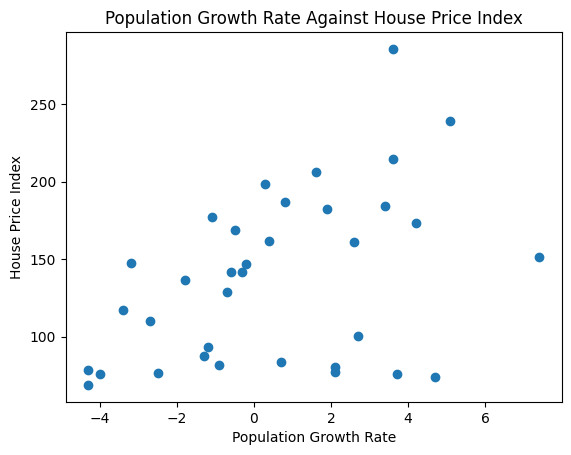

In [39]:
plt.figure()
plt.scatter(joint_df.population_growth, joint_df.house_price_index)
plt.xlabel("Population Growth Rate")
plt.ylabel("House Price Index")
plt.title("Population Growth Rate Against House Price Index")
plt.show()

In [40]:
joint_df[['population_growth', 'house_price_index']].corr()

,population_growth,house_price_index
population_growth,1.000000,0.426462
house_price_index,0.426462,1.000000


<p>There is little <b>positive co-relation</b> between the house price and population growth rate at <b>0.344738</b> and the scatter plot forms a shapeless cloud.</p>

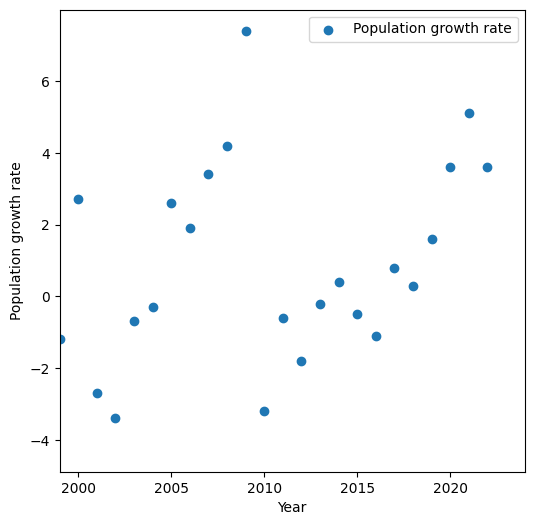

In [41]:
plt.subplots(figsize=(6, 6))
plt.scatter(joint_df.year, joint_df.population_growth, label='Population growth rate')
plt.xlim(1999, 2024)
plt.xlabel("Year")
plt.ylabel("Population growth rate")
plt.legend()
plt.show()

<h4>Population Growth Rate Against Percentage Change in Labor and Building Materials</h4>

In [42]:
joint_df[['population_growth', 'pc_change_labor']].corr()

,population_growth,pc_change_labor
population_growth,1.000000,-0.265569
pc_change_labor,-0.265569,1.000000


<h4><b>Unemployment Rate</b></h4>

In [43]:

urate = pd.read_csv("CSV_Files/unemployment_rate.csv")
urate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [44]:
joint_df1 = merge_df(joint_df, urate)
joint_df1.tail()

,DATE,per_capita_income,house_price_index,year,price_to_income_ratio,pc_change_labor,population_growth,UNRATE
30,2018-01-01,52439.0,198.292,2018,0.003781,0.526435,0.3,4.0
31,2019-01-01,55007.0,206.479,2019,0.003754,0.455381,1.6,4.0
32,2020-01-01,56630.0,214.868,2020,0.003794,0.964348,3.6,3.6
33,2021-01-01,66753.0,239.322,2021,0.003585,0.156747,5.1,6.4
34,2022-01-01,64298.0,285.536,2022,0.004441,0.377565,3.6,4.0


In [45]:
joint_df1[['UNRATE', 'house_price_index']].corr()

,UNRATE,house_price_index
UNRATE,1.000000,-0.231124
house_price_index,-0.231124,1.000000


<p>There exist very little negative co-relation between the house price and the unemployment rate</p> 

# Number of house units According to The Stage of Construction

In [46]:
house_nt_cnstrct = pd.read_csv("CSV_Files/houses_not_constrct.csv") # No. of houses not constructed
house_nt_cnstrct.head()

,DATE,NHFSEPNTS
0,1999-01-01,38.0
1,1999-02-01,38.0
2,1999-03-01,36.0
3,1999-04-01,41.0
4,1999-05-01,39.0


In [47]:
house_un_construction = pd.read_csv("CSV_Files/houses_under_constrct.csv") # No. of houses under construction
house_un_construction.head()

,DATE,NHFSEPUCS
0,1999-01-01,178.0
1,1999-02-01,180.0
2,1999-03-01,185.0
3,1999-04-01,180.0
4,1999-05-01,184.0


In [48]:
house_stage1 = merge_df(house_nt_cnstrct, house_un_construction)
house_stage1 = house_stage1.rename(columns={"NHFSEPNTS": 'not_constructed', "NHFSEPUCS": "under_construction"})
house_stage1.head()

,DATE,not_constructed,under_construction
0,1999-01-01,38.0,178.0
1,1999-02-01,38.0,180.0
2,1999-03-01,36.0,185.0
3,1999-04-01,41.0,180.0
4,1999-05-01,39.0,184.0


In [49]:
house_comp_construction = pd.read_csv("CSV_Files/houses_complete_constrct.csv")
house_comp_construction.head()

,DATE,NHFSEPCS
0,1999-01-01,68.0
1,1999-02-01,67.0
2,1999-03-01,68.0
3,1999-04-01,69.0
4,1999-05-01,72.0


In [50]:
houses_stage = merge_df(house_stage1, house_comp_construction)
houses_stage = houses_stage.rename(columns={"NHFSEPCS": "complt_constrct"})
houses_stage.head()

,DATE,not_constructed,under_construction,complt_constrct
0,1999-01-01,38.0,178.0,68.0
1,1999-02-01,38.0,180.0,67.0
2,1999-03-01,36.0,185.0,68.0
3,1999-04-01,41.0,180.0,69.0
4,1999-05-01,39.0,184.0,72.0


<h4><b>Rental House Prices</b></h4>

In [51]:
rental = pd.read_csv("CSV_Files/rent_prices.csv")
rental.head()

,DATE,CUSR0000SEHA
0,1981-01-01,84.7
1,1981-02-01,85.2
2,1981-03-01,85.9
3,1981-04-01,86.5
4,1981-05-01,87.1


In [52]:
joint_df = merge_df(joint_df1, rental)
joint_df = merge_df(joint_df, houses_stage)
joint_df.head()

,DATE,per_capita_income,house_price_index,year,price_to_income_ratio,pc_change_labor,population_growth,UNRATE,CUSR0000SEHA,not_constructed,under_construction,complt_constrct
0,1999-01-01,28179.0,93.208,1999,0.003308,1.148340,-1.2,4.3,175.2,38.0,178.0,68.0
1,2000-01-01,29891.0,100.552,2000,0.003364,1.112769,2.7,4.0,180.9,41.0,188.0,82.0
2,2001-01-01,31585.0,109.846,2001,0.003478,0.989741,-2.7,4.2,188.0,41.0,173.0,82.0
3,2002-01-01,31480.0,117.144,2002,0.003721,0.927797,-3.4,5.7,196.8,43.0,190.0,77.0
4,2003-01-01,32135.0,128.461,2003,0.003998,0.859482,-0.7,5.8,203.2,52.0,206.0,83.0


In [53]:
joint_df = joint_df.rename(columns={"CUSR0000SEHA": "rent_price"})
joint_df.head()

,DATE,per_capita_income,house_price_index,year,price_to_income_ratio,pc_change_labor,population_growth,UNRATE,rent_price,not_constructed,under_construction,complt_constrct
0,1999-01-01,28179.0,93.208,1999,0.003308,1.148340,-1.2,4.3,175.2,38.0,178.0,68.0
1,2000-01-01,29891.0,100.552,2000,0.003364,1.112769,2.7,4.0,180.9,41.0,188.0,82.0
2,2001-01-01,31585.0,109.846,2001,0.003478,0.989741,-2.7,4.2,188.0,41.0,173.0,82.0
3,2002-01-01,31480.0,117.144,2002,0.003721,0.927797,-3.4,5.7,196.8,43.0,190.0,77.0
4,2003-01-01,32135.0,128.461,2003,0.003998,0.859482,-0.7,5.8,203.2,52.0,206.0,83.0


In [54]:
joint_df[['rent_price', 'house_price_index']].corr()

,rent_price,house_price_index
rent_price,1.000000,0.880431
house_price_index,0.880431,1.000000


<p>There is very <b>high positive correlation</b><b>(0.976022)</b> between rent prices and house prices. This means that an increase in the price of puchasing a house leads to an increase in the price of rental rooms.</p>

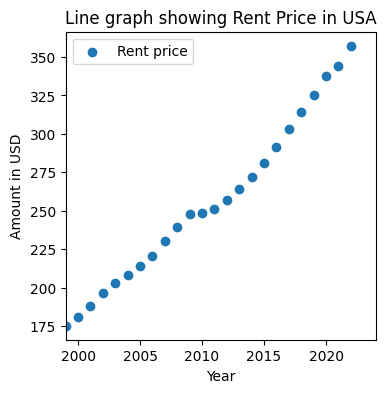

In [55]:
plt.figure(figsize=(4,4))
plt.scatter(joint_df.year, joint_df.rent_price, label="Rent price")
plt.xlim(1999, 2024)
plt.xlabel("Year")
plt.ylabel("Amount in USD")
plt.legend()
plt.title("Line graph showing Rent Price in USA")
plt.show()

In [56]:
joint_df[['rent_price', 'UNRATE']].corr()

,rent_price,UNRATE
rent_price,1.000000,-0.081033
UNRATE,-0.081033,1.000000


<p>Very little negative co-relation is observed for the rent price and the unemployment rate. This disqualifies the two columns for any close relationship in predicting price of houses.</p>

In [57]:
joint_df[['rent_price', 'pc_change_labor']].corr()

,rent_price,pc_change_labor
rent_price,1.00000,-0.82529
pc_change_labor,-0.82529,1.00000


<p><b>Strong Negative Co-relation(-0.85372):</b> Negative Co-relation in percentage change in labour and rent_price. The increase in one leads to the decrease in the other</p>

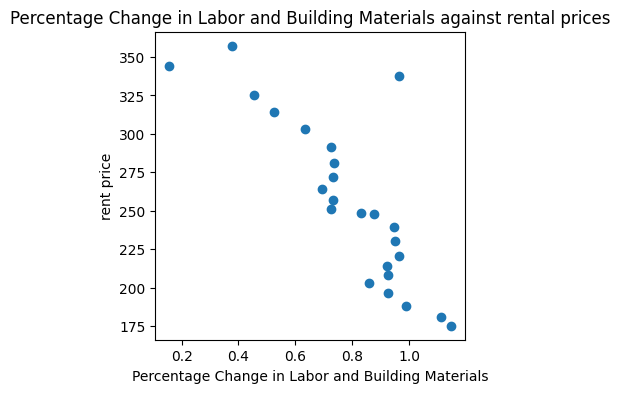

In [58]:
plt.figure(figsize=(4,4))
plt.scatter(joint_df.pc_change_labor, joint_df.rent_price)
plt.xlabel("Percentage Change in Labor and Building Materials")
plt.ylabel("rent price")
plt.title("Percentage Change in Labor and Building Materials against rental prices")
plt.show()

<p>The scatter distribution shows an almost linear co-relation between the two with a negative gradient(weight)</p>

In [59]:
joint_df.tail()

,DATE,per_capita_income,house_price_index,year,price_to_income_ratio,pc_change_labor,population_growth,UNRATE,rent_price,not_constructed,under_construction,complt_constrct
19,2018-01-01,52439.0,198.292,2018,0.003781,0.526435,0.3,4.0,314.531,52.0,178.0,63.0
20,2019-01-01,55007.0,206.479,2019,0.003754,0.455381,1.6,4.0,325.314,59.0,211.0,76.0
21,2020-01-01,56630.0,214.868,2020,0.003794,0.964348,3.6,3.6,337.531,55.0,194.0,76.0
22,2021-01-01,66753.0,239.322,2021,0.003585,0.156747,5.1,6.4,344.415,75.0,188.0,40.0
23,2022-01-01,64298.0,285.536,2022,0.004441,0.377565,3.6,4.0,357.322,95.0,268.0,31.0


In [60]:
joint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   24 non-null     object 
 1   per_capita_income      24 non-null     float64
 2   house_price_index      24 non-null     float64
 3   year                   24 non-null     int32  
 4   price_to_income_ratio  24 non-null     float64
 5   pc_change_labor        24 non-null     float64
 6   population_growth      24 non-null     float64
 7   UNRATE                 24 non-null     float64
 8   rent_price             24 non-null     float64
 9   not_constructed        24 non-null     float64
 10  under_construction     24 non-null     float64
 11  complt_constrct        24 non-null     float64
dtypes: float64(10), int32(1), object(1)
memory usage: 2.3+ KB


In [61]:
joint_df.describe()

,per_capita_income,house_price_index,year,price_to_income_ratio,pc_change_labor,population_growth,UNRATE,rent_price,not_constructed,under_construction,complt_constrct
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,43088.291667,164.794667,2010.500000,0.003827,0.788058,0.912500,5.670833,256.392167,50.625000,180.000000,82.458333
std,10542.310099,44.466074,7.071068,0.000475,0.233711,2.744372,1.756597,53.907896,20.792583,65.838406,40.887948
min,28179.000000,93.208000,1999.000000,0.003125,0.156747,-3.400000,3.600000,175.200000,22.000000,72.000000,31.000000
25%,34530.000000,140.290250,2004.750000,0.003527,0.716722,-0.800000,4.275000,212.750000,36.750000,133.500000,54.750000
50%,41310.000000,161.605500,2010.500000,0.003722,0.844549,0.350000,5.150000,249.931500,44.000000,183.000000,76.000000
75%,48937.250000,185.086000,2016.250000,0.004057,0.947163,2.875000,6.450000,294.564000,61.500000,215.000000,90.750000
max,66753.000000,285.536000,2022.000000,0.004888,1.148340,7.400000,9.800000,357.322000,95.000000,318.000000,191.000000


In [62]:
len(joint_df)

24

# Model Creation 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()

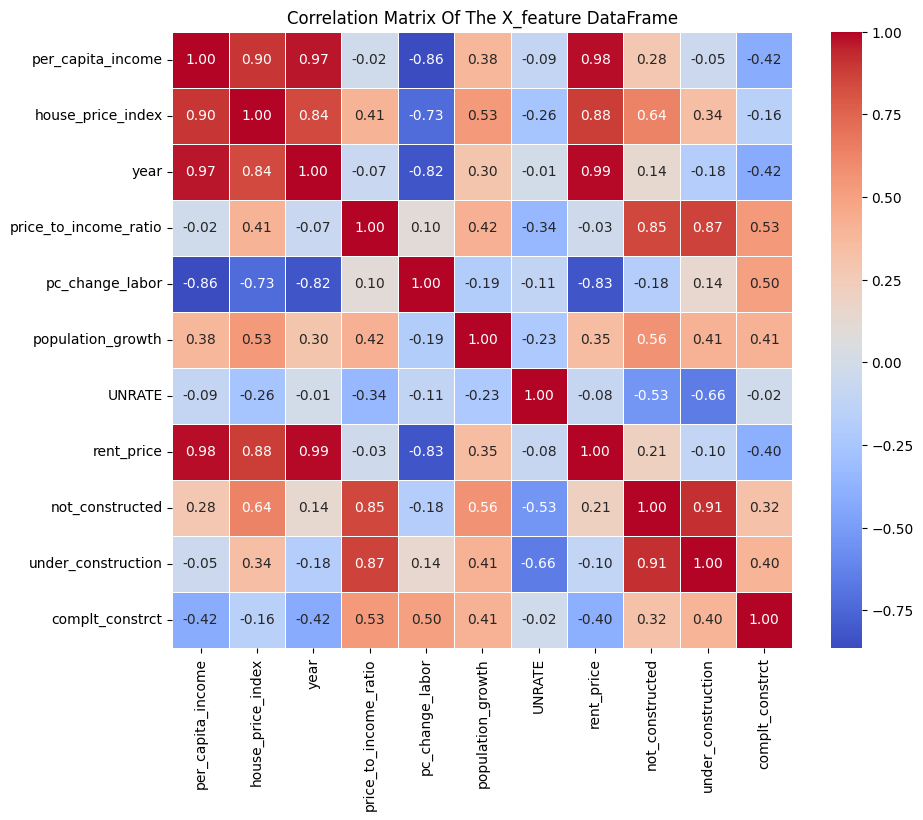

In [65]:
my_df = joint_df.drop("DATE", axis=1)
# Plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(my_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Of The X_feature DataFrame")
plt.show()

In [66]:
df = my_df.copy()

In [67]:
X = df.drop(columns = 'house_price_index')
y = df.house_price_index

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [69]:
model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)
y_pred

array([182.37722719, 172.43285648,  92.03046789, 191.87803132,
       143.54435783])

In [71]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Absolute Error:  3.2115669763474957
Root Mean Squared Error:  12.225444913617064


In [72]:
pd.DataFrame(y_pred, y_test)

,0
house_price_index,
184.517,182.377227
168.629,172.432856
93.208,92.030468
186.793,191.878031
147.396,143.544358


In [73]:
from sklearn.metrics import r2_score

In [74]:
score=[]
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    ypred = lr.predict(x_test)
    score.append(r2_score(y_test, ypred))

In [75]:
print("Maximum Score: ",score[np.argmax(score)])
score.sort()
print("Mean Score For all values: ", (sum(score)/len(score)))

Maximum Score:  0.9981544701570717
Mean Score For all values:  0.9343388305455747


In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100,max_depth=9,random_state = 0)
regressor1.fit(x_train, y_train) 

RandomForestRegressor(max_depth=9, random_state=0)

In [77]:
Y_pred = regressor1.predict(x_test)

r2_score(y_test,Y_pred)

0.928952702100756

In [78]:
scoree=[]
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(x_train, y_train) 
    yprd = regressor.predict(x_test)
    scoree.append(r2_score(y_test, yprd))

In [79]:
np.argmax(scoree)

499

In [80]:
print("Maximum Score: ",scoree[np.argmax(scoree)])
scoree.sort()
print("Mean Score For all values: ", (sum(scoree)/len(scoree)))

Maximum Score:  0.9876262955089233
Mean Score For all values:  0.6947413612519683


<p>Using both the Linear Regression and Random Forest regressor to create our prediction model.</p>
<p>Noting that the accuracy for both models is above 65% at average with the Linear Regression model giving highest average accuracy at <b>0.9343388305455747</b> thus being the preferred model to predict the prices of houses with regard to the given columns.</p>